# Práctica 1: Aprendizaje automático

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, **recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias** para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [ ]:
RANDOM_STATE = 42

# Apartado 1: Clustering

__Nombres de los estudiantes: Fernando Leal y Jinqing Cai__

In [ ]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1) Carga del conjunto de datos

> Crea un dataframe a partir del fichero `Mall_Customers.csv` que se proporciona junto con la práctica. 
> 
> El conjunto de datos contiene por cada fila los datos de un préstamo que fue concedido por una empresa de crédito p2p. Las variables que caracterizan el préstamo son las siguientes:
>   - `Customer ID` es el identificador del cliente
>   - `Gender` es el género del cliente (Male|Female)
>   - `Annual Income` son los ingresos anuales en cientos de dólares del cliente
>   - `Age` es la edad del cliente
>   - `Spending Score` es una puntuación asignada por el mall basada en el comportamiento del cliente y a sus gastos

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IA2/Mall_Customers.csv', index_col = 0)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## 2) Análisis de los datos

### 2.1) Numéricos

> Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

#### Distribuciones de las distintas variables numéricas

Con el método `describe` de `DataFrame` se pueden obtener los distintos parámetros estatísticos, asociaciados con las variables numéricas:

- `mean`: Media
- `std`: Desviación típica / Desviación estándar
- `min`, `max`: Los máximos y mínimos valores alcanzados por la variable
- `25%`, `50%`, `75%`: Percentiles de sus respectivos porcentajes

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


Para trazar la **gráfica de densidad**, seleccionamos la variable que queremos dibujar, e invocamos el método `plot`.

<Axes: ylabel='Density'>

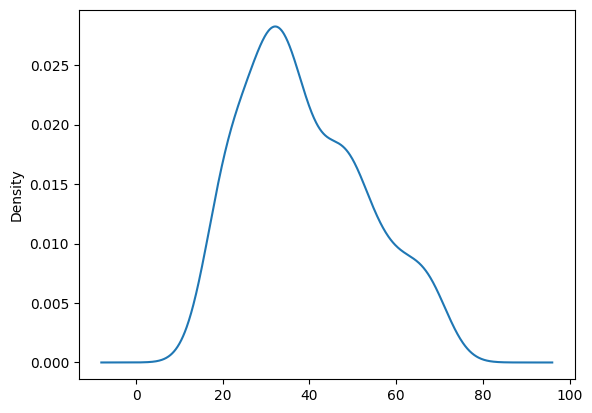

In [ ]:
df['Age'].plot(kind='density')

<Axes: ylabel='Density'>

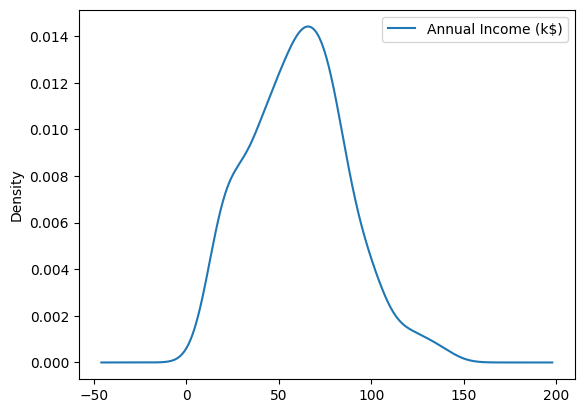

In [ ]:
df[['Annual Income (k$)']].plot(kind='density')

<Axes: ylabel='Density'>

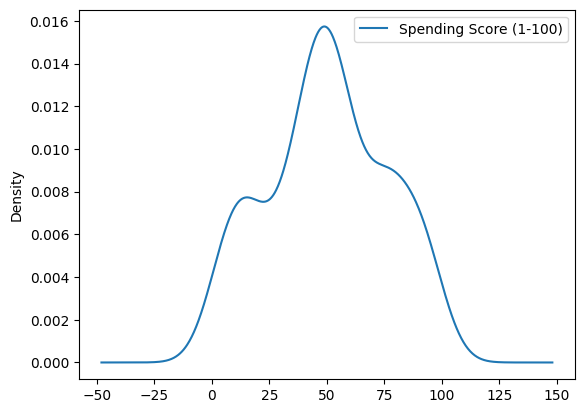

In [ ]:
df[['Spending Score (1-100)']].plot(kind='density')

También podemos sobreponer las tres gráficas. Se puede observar que la forma de gráfica de `Annual Income` y de `Spending Score` son más similares, alcanzando su densidad máxima cerca del valor 50, mientras que la gráfica de `Age` presenta un pico que no tienen las otras dos gráficas. 

La razón es que la estadística se ha obtenido principalmente de gente entre 20 - 40 años, de ahí ese pico.

<Axes: ylabel='Density'>

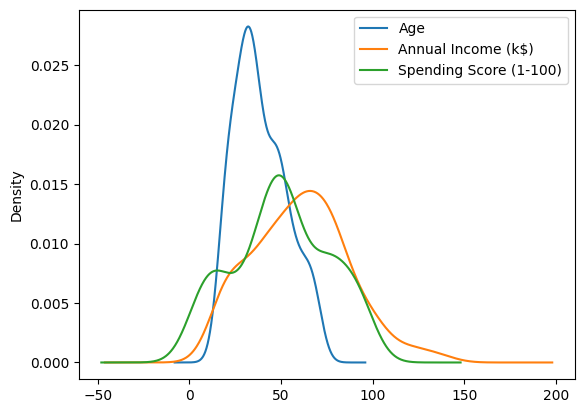

In [ ]:
df.plot(kind='density')

#### Coeficiente de corelación entre las variables numéricas

El coeficiente de correlación es una medida de dependencia **lineal** entre dos variables. Su valor oscila en el intervalo $[-1, 1]$ y tiene la siguiente interpretación:

1. $r = 1$: Indica una relación **directa** entre dos variables. Cuando una aumenta, la otra también en proporción constante.
2. $0 < r < 1$: Indica que existe alguna correlación positiva, siendo más fuerte cuanto más cerca esté el valor de 1.
3. $r = 0$: Indica que no existe una relación lineal. Esto no excluque que puedan existir relaciones no lineales (Por ejemplo, que una variable sea el cuadrado de la otra).
4. $-1 < r < r$: Indica que existe una correlación negativa
5. $r = -1$: existe una correlación negativa perfecta. Tienen una dependencia total entre las dos variables llamada **relación opuesta**, es decir, cuando una de ellas aumenta, la otra disminuye en proporción constante.

Por este motivo, la matriz es simétrica, y su diagonal es todo 1.

In [ ]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


Por la tabla, se puede ver que ninguna de las casillas no diagonales se acercan a los valores extremos -1 y 1. 

La correlación entre edad y ingreso anual tiene un valor cercano del 0 por la parte negativa. Indica que están asociadas en sentido inverso. Es decir, cuando uno aumenta, otro disminuye. No encaja con nuestra idea inicial, porque lo intuitivo sería que ganase más cuando mayor sea. Esto puede deber a que tenemos pocas muestras.

La correlación entre edad y spending score también es negativo. Spending Score es una puntuación asignada por el mall basada en el comportamiento del cliente y a sus gastos. Se podría interpretar que cuando mayor es, menos gasta en esta tienda en donde se ha realizado la estadística.

Por último, hay una correlación positiva entre ingreso anual y spending score. Es decir, cuando mayor es el ingreso, más puntuación tiene, lo cual tiene sentido.

#### Coeficiente de correlación entre las variables numéricas **divididas por género**

In [ ]:
df.groupby('Gender').corr()

Age  Annual Income (k$)  \
Gender                                                        
Female Age                     1.000000            0.059912   
       Annual Income (k$)      0.059912            1.000000   
       Spending Score (1-100) -0.375439            0.047542   
Male   Age                     1.000000           -0.092978   
       Annual Income (k$)     -0.092978            1.000000   
       Spending Score (1-100) -0.279628           -0.023684   

                               Spending Score (1-100)  
Gender                                                 
Female Age                                  -0.375439  
       Annual Income (k$)                    0.047542  
       Spending Score (1-100)                1.000000  
Male   Age                                  -0.279628  
       Annual Income (k$)                   -0.023684  
       Spending Score (1-100)                1.000000

Al agrupar por género, se puede ver que la correlación entre edad y spending score sigue siendo negativo mientras que para caso de mujeres, el coeficiente de correlación entre edad e ingreso anual ha pasado a ser positivo.

En el caso de los hombres, el coeficiente de correlación entre ingresos anuales y spending score pasa a ser negativo.

#### Diagramas de dispersión

Las diagramas de dispersión permiten visualizar **si existe alguna relación o correlación entre dos variables** (una siendo el eje X y otra el eje Y). 

Vamos a analizar las diagramas de dispersión basandonos en esta guía procedente de la página: https://datavizcatalogue.com/ES/metodos/diagrama_de_dispersion.html

diagrama_de_dispersion.svg

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


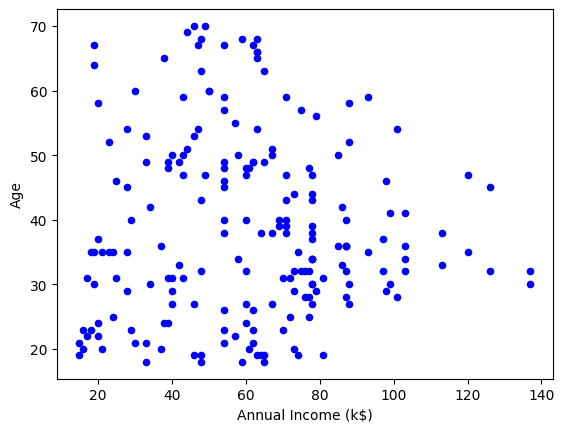

In [ ]:
_ = df.plot.scatter(x='Annual Income (k$)', y='Age', c='Blue')

En este caso, siguiendo la guía, podemos decir que no hay una relación clara entre las variables Annual Income y Age. Su coeficiente de correlación era cercano al 0, lo cual indicaba que no hay una correlación lineal. Y cuadra con el resultado obtenido de la gráfica.

Sí que podemos decir que hay una **fuerza de correlación débil**.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

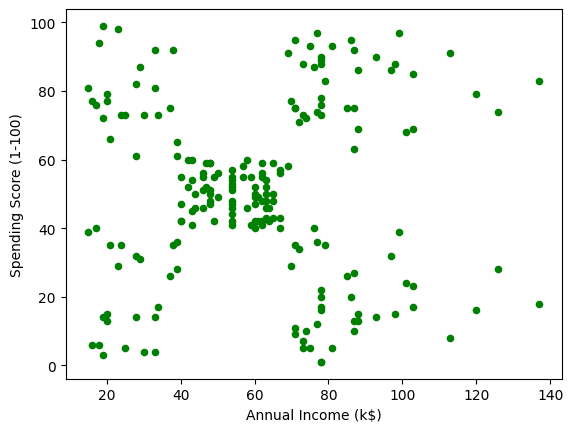

In [ ]:
df.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', c='Green')

De nuevo, no tiene una correlación lineal entre Annual Income y Spending Score, y cuadra con su coeficiente de correlación (cerca del 0). Se puede ver que hay gente que gana mucho dinero (140), pero con Spending Score bajo. Y también casos con Annual Income bajo (20), y Spending Score alto. Por lo que no hay una relación clara entre ambas variables.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

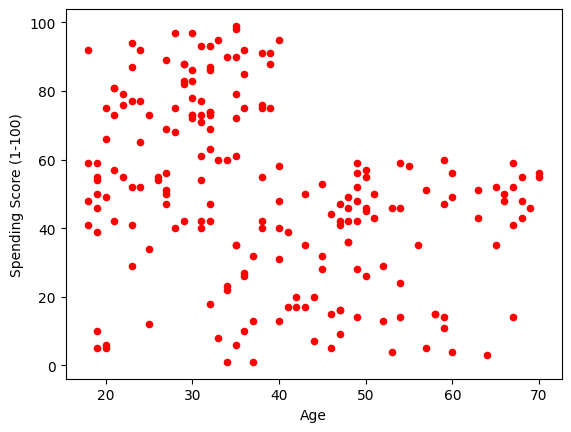

In [ ]:
df.plot.scatter(x='Age', y='Spending Score (1-100)', c='Red')

No hay una fuerza de correlación en este caso entre Spending Score y Age, ni una relación clara entre ambas variables.

Sí que podemos decir que la gente con mayor Spending Score son aquellos con edad inferior a 45 años. A partir de 45 ya no hay muestra que alcanza un Spending Score superior al 60.

#### Matriz de dispersión

La matriz de dispersión **mezcla dos tipos de diagrama en la misma gráfica**:

*   Diagrama de densidad en la diagonal
*   Diagrama de dispersión en casillas no diagonales

En este caso, hemos decidido dar un color diferente para muestras de hombres y de mujeres, para ver si hay mucha diferencia de forma en las gráficas.

Se puede observar que no hay una diferencia sustancial en las diagramas de dispersión a pesar de agrupar por género. **Sigue sin aparecer una clara correlación entre las variables.**

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Age'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Annual Income (k$)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>],
       [<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>,
        <Axes: xlabel='Spending Score (1-100)', ylabel='Spending Score (1-100)'>]],
      dtype=object)

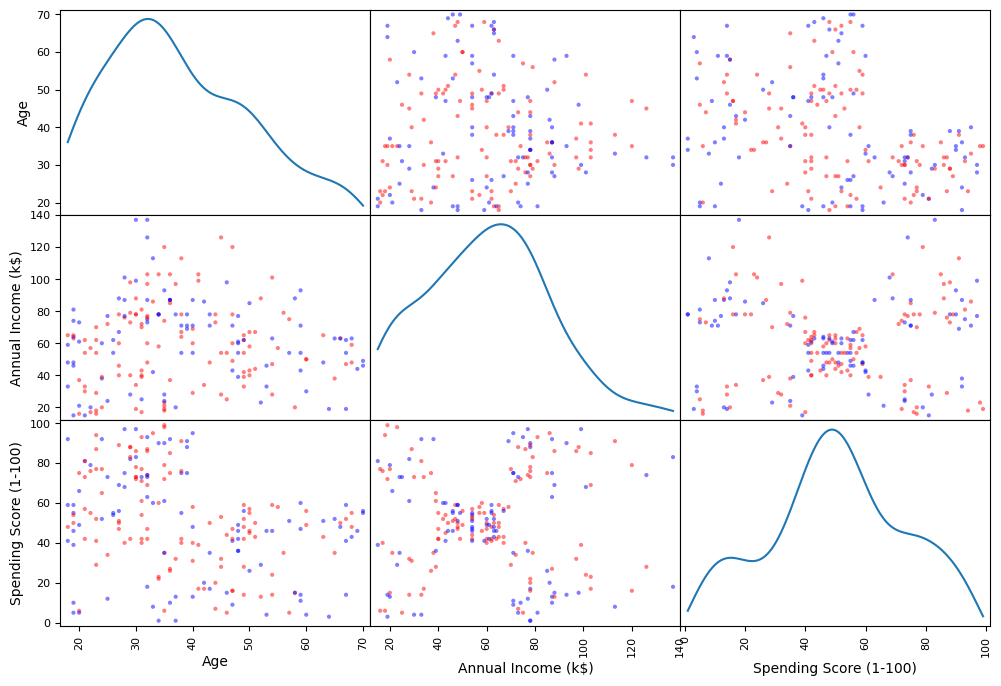

In [ ]:
from pandas.plotting import scatter_matrix
dict_colors = {'Female': 'Red', 'Male': 'Blue'}
color = df['Gender'].map(dict_colors)
scatter_matrix(df, diagonal='density', color=color, figsize=(12,8))


### 2.2) Categóricos

> Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

En este caso, sólo tenemos una variable categórica que es el género. Podemos dibujar un diagrama de barras y diagrama circular para visualizar la proporción de muestras de cada género.

[Text(0, 0, '112'), Text(0, 0, '88')]

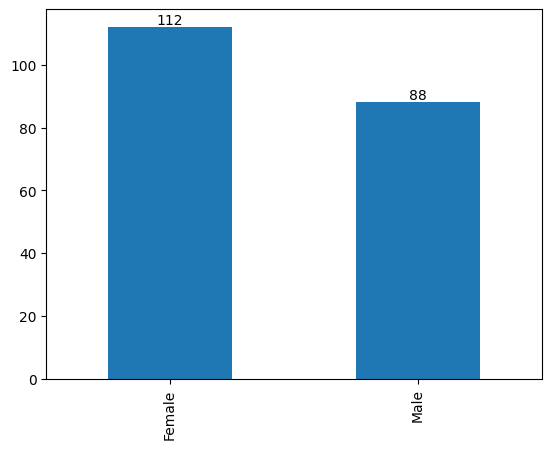

In [ ]:
d = df['Gender'].value_counts().plot(kind = "bar")
d.bar_label(d.containers[0])

<Axes: ylabel='Gender'>

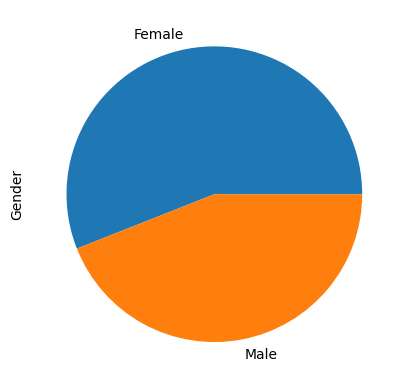

In [ ]:
df['Gender'].value_counts().plot(kind = "pie")

Se puede ver que hay ligeramente más muestras procedente de mujeres (112) que de hombres (88). 

## 3) Preprocesar los datos

> Para el clustering vamos a trabajar solamente con las variables `Annual income`, y `spending score`.
>
> Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de clientes similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).
>
> Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

<Axes: ylabel='Density'>

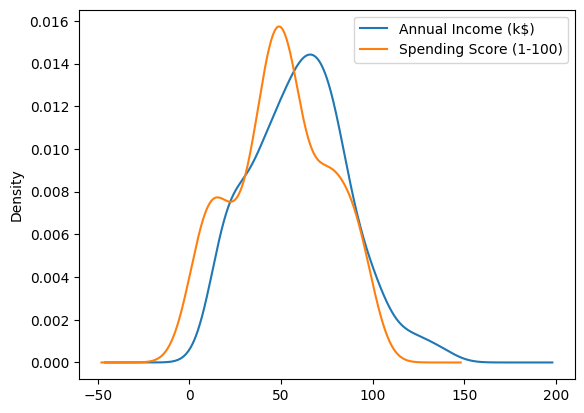

In [ ]:
df[['Annual Income (k$)', 'Spending Score (1-100)']].plot(kind='density')

Parece que las dos variables _Annual Income_ y _Spending score_ son comparables. Ambas tienen datos en el rango de -50 y 200, así que parece que no es necesario estandarizar los valores

Decidimos **probar a hacerlo sin estandarizar** para contrastarlo luego con datos estandarizados

## 4) Encontrar el número óptimo de clusters

> Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo y el índice davies_boulding en función del número de clusters.

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import davies_bouldin_score

X = df[['Annual Income (k$)','Spending Score (1-100)']]

def elbow_plot(X,ran):
    """https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method"""
    distorsions = []
    
    classifiers = {k: KMeans(n_clusters=k, n_init='auto',random_state=RANDOM_STATE) for k in ran}
    score = [clasif.fit(X).score(X) for _, clasif in classifiers.items()]
    davies = [davies_bouldin_score(X, labels=clasif.predict(X)) for _,clasif in classifiers.items()]
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(15,8))
    ax1.plot(ran, score)
    ax1.grid(True)
    ax1.set_title('Diagrama del codo')
    ax2.plot(ran, davies)
    ax2.set_title('Davies boulding')
    return classifiers

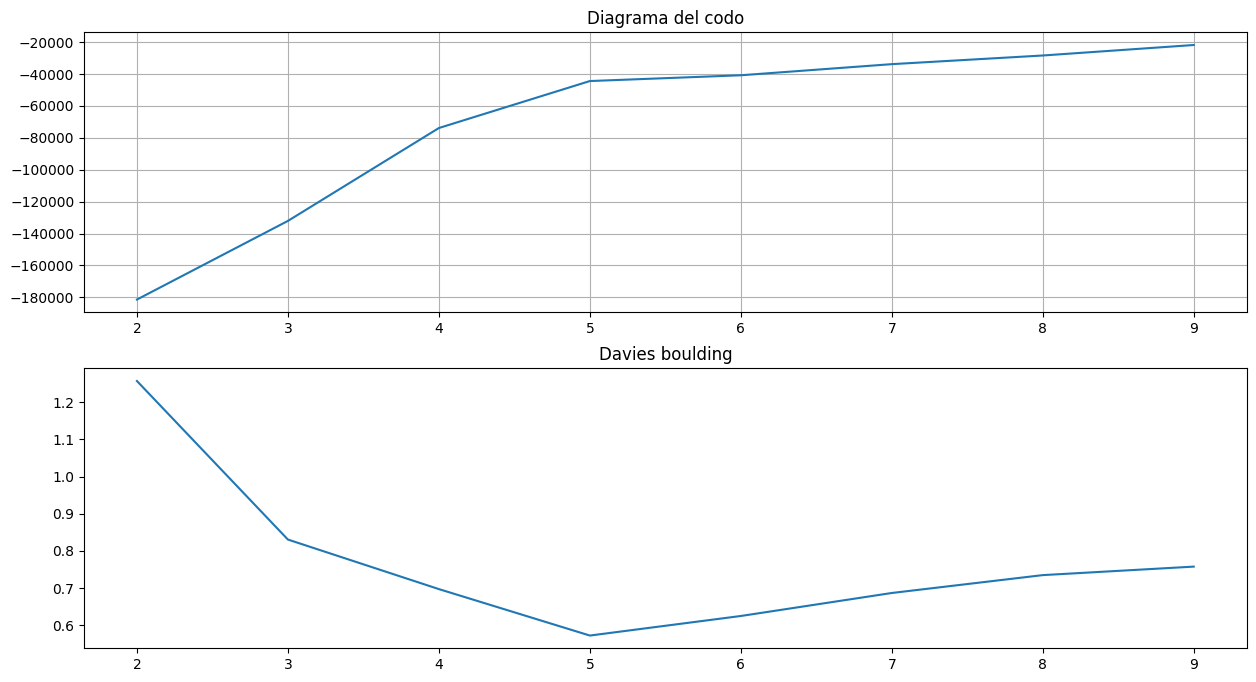

In [ ]:
classifiers = elbow_plot(X,range(2,10))

Se puede ver que para este caso, el índice de Davies-Bouldin alcanza su mejor valor (el más pequeño) con $k = 5$. 

Cuadra con lo que se observa en diagrama del codo, donde a partir del $k = 5$ aumentar el valor del $k$ **no produce una mejora tan significativa** como pasaba con valores menores de 5.

----

Simplemente para comprobar que nuestar decisión de no estandarizar los datos fuese válida, veamos si cambia la conclusión estandarizando los datos.

{2: KMeans(n_clusters=2, n_init='auto', random_state=42),
 3: KMeans(n_clusters=3, n_init='auto', random_state=42),
 4: KMeans(n_clusters=4, n_init='auto', random_state=42),
 5: KMeans(n_clusters=5, n_init='auto', random_state=42),
 6: KMeans(n_clusters=6, n_init='auto', random_state=42),
 7: KMeans(n_clusters=7, n_init='auto', random_state=42),
 8: KMeans(n_init='auto', random_state=42),
 9: KMeans(n_clusters=9, n_init='auto', random_state=42)}

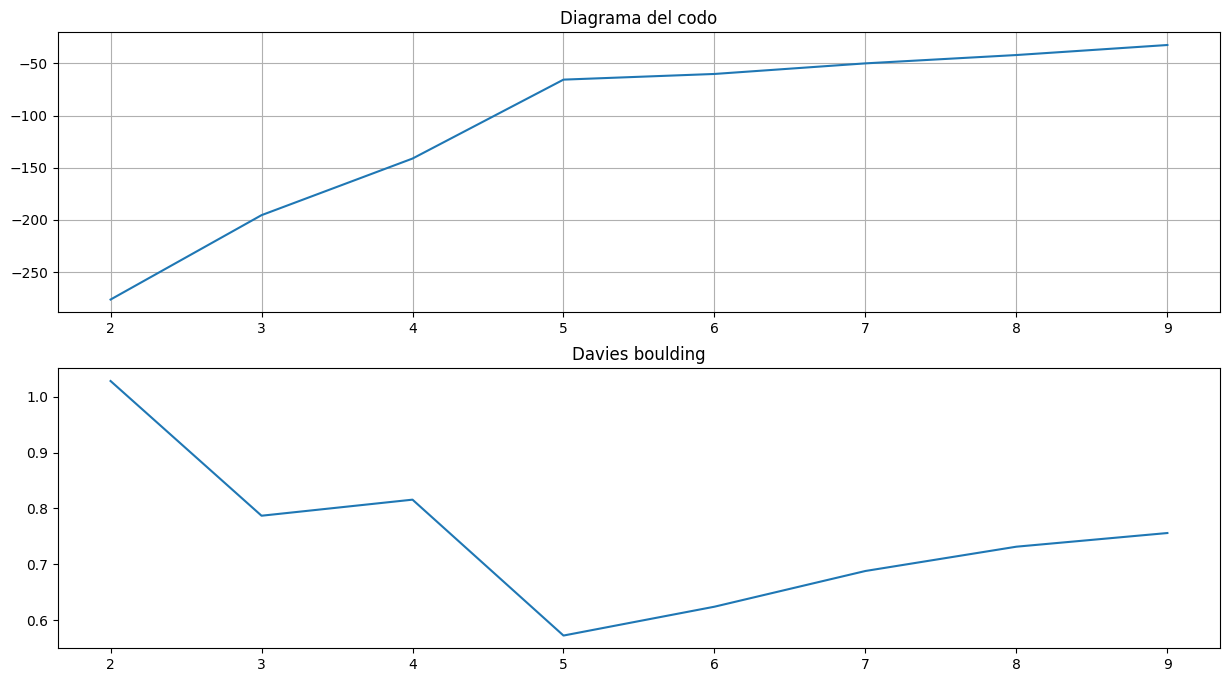

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizamos los datos para que estén centrados en 0 y con varianza 1
scaler = StandardScaler()
standarizado =  scaler.fit_transform(X.copy())

elbow_plot(standarizado,range(2,10))

Efectivamente, el mejor valor de $k$ sigue siendo 5.

## 5) Descripción de los clusters

> Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí. 
>
> Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema. ¿Qué perfil de clientes quedan en cada cluster? 
>
> __Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

En este caso, **no hemos tenido que escalar los datos**. De los clasificadores obtenidos, cogemos aquel con `k`= $5$ y procedemos a realizar un diagrama de dispersión, asignando a cada muestra el color del cluster que se le ha asignado en la clasificación

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

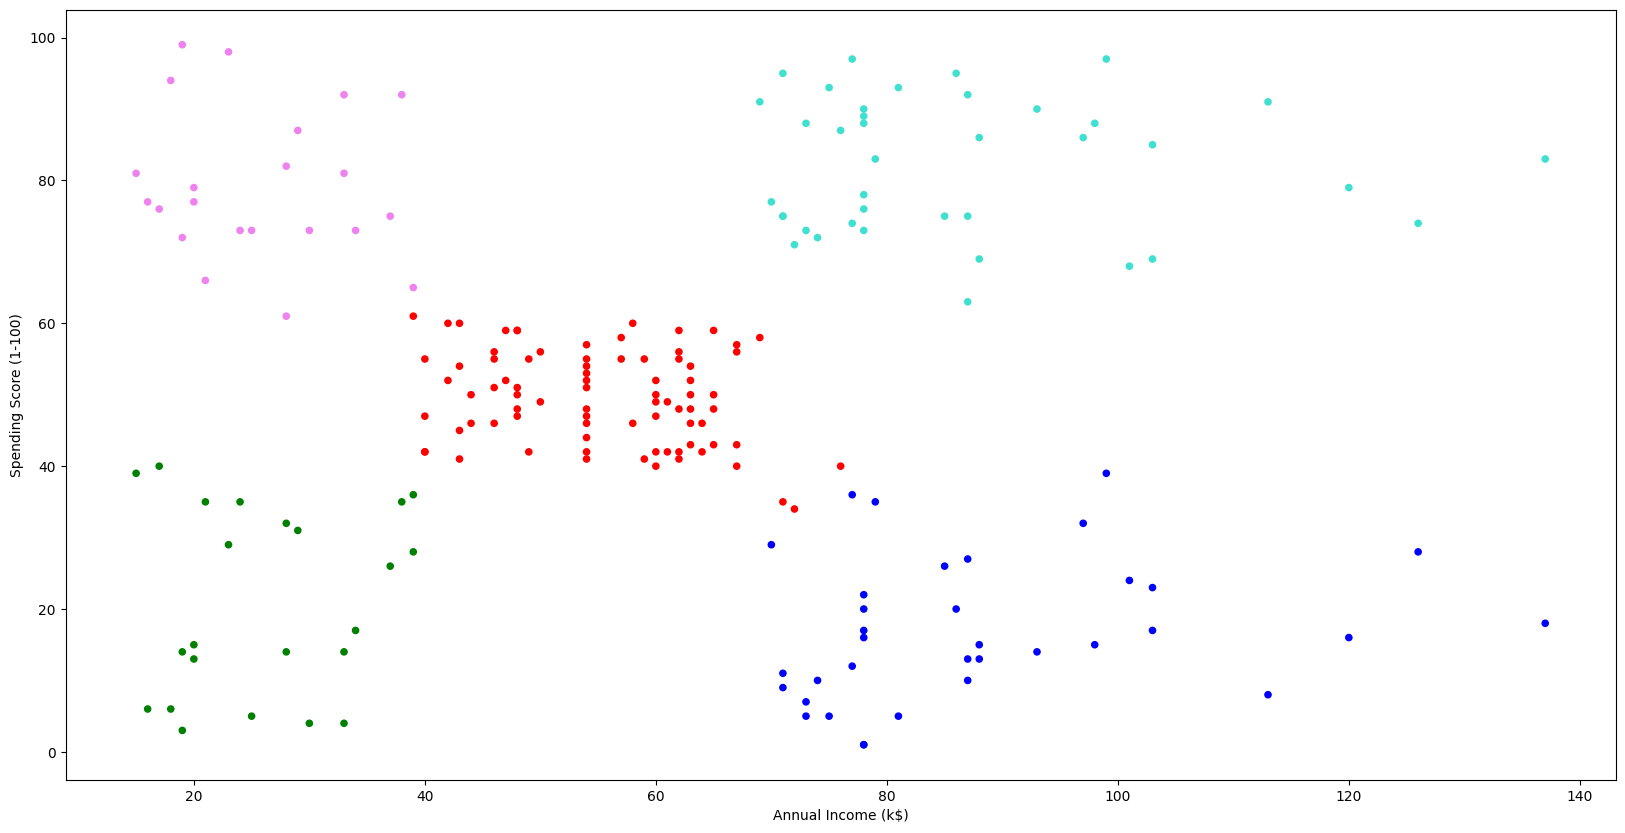

In [ ]:
# X = df[['Annual Income (k$)','Spending Score (1-100)']]
kmeans = classifiers[5]
labels = pd.Series(kmeans.predict(X))
col_dict = {
    0: 'Red',
    1: 'Blue',
    2: 'Green',
    3: 'Violet',
    4: 'Turquoise'
}
colors = labels.map(col_dict)
df.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', c=colors, figsize=(20,10))

De los 5 clusters obtenidos, hemos llegado a la conclusión de que describen los siguientes perfiles:

1. **Verde**: gente joven (< 40 años) con un Spending Score bajo (<= 40)
2. **Violeta**: gente joven (< 40 años) con un Spending Score alto (>= 60)
3. **Rojo**: gente con edad entre (40 - 65 en general). Todo ello tienen un Spending Score entre 40 y 60. Es el cluster más compacto de hecho.
4. **Azul**: gente mayores (> 75), con un Spending Score bajo (< 40)
5. **Turquesa**: gente mayores (> 75), con un Spending Score alto (> 60)


## 6) Clustering jerárquico aglomerativo
> Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



Procedemos a realizar el mismo análisis para el clasificador `AlggomerativeClustering`.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from sklearn.metrics import davies_bouldin_score

Puesto que `AgglomerativeClustering` no define un método `score` como `KMeans`, implementamos nuestra propia función `get_score` que nos da la suma de las normas de las diferencias entre los puntos de un cluster y su centroide.

In [ ]:
def get_score(labels, X):
    """Returns the sum of the norms of the differences between the elements in the cluster and the centroid"""
    from numpy.linalg import norm
    return sum(norm(X[labels == val] - X[labels == val].mean()) for val in set(labels))

def ac_elbow_plot(X,ran):
    """https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method"""
    
    classifiers = {k: AgglomerativeClustering(n_clusters=k) for k in ran}
    score = [get_score(clasif.fit_predict(X),X) for _, clasif in classifiers.items()]
    davies = [davies_bouldin_score(X, labels=clasif.labels_) for _,clasif in classifiers.items()]
    
    fig, (ax1, ax2) = plt.subplots(2,figsize=(15,8))
    ax1.plot(ran, score)
    ax1.grid(True)
    ax1.set_title('Diagrama del codo')
    ax2.plot(ran, davies)
    ax2.set_title('Davies boulding')
    return classifiers

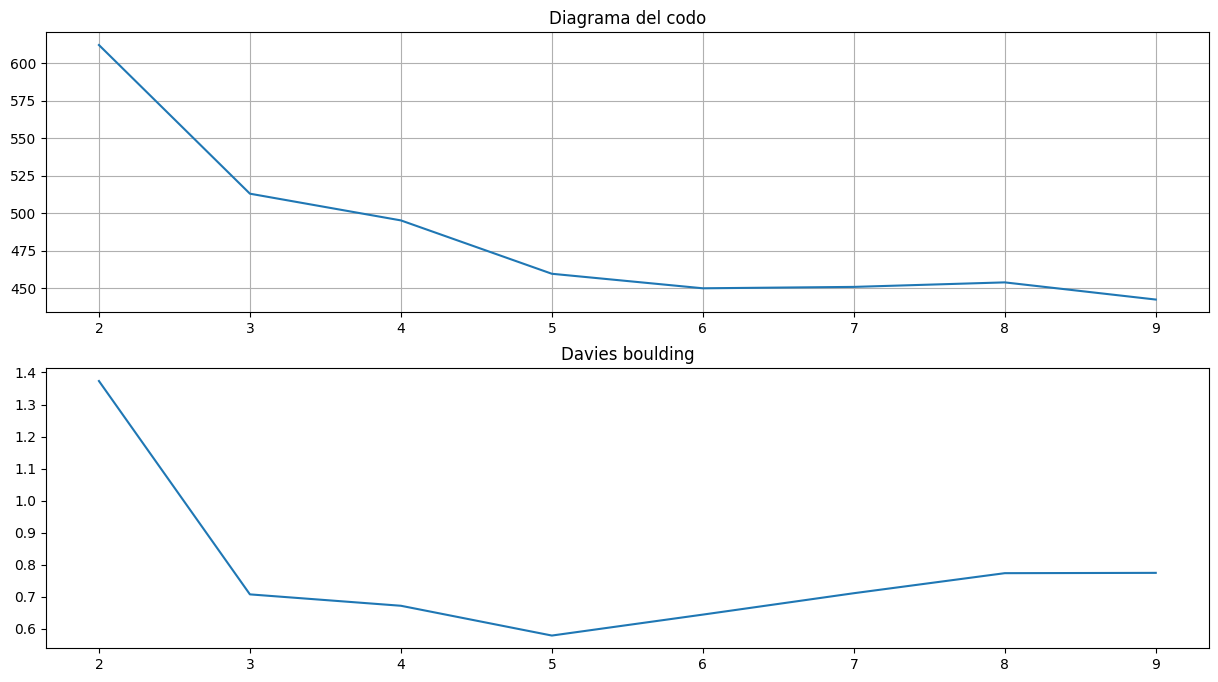

In [ ]:
classifiers = ac_elbow_plot(X,range(2,10))

Observamos que de nuevo nuestro método parece funcionar mejor con `5` clusters. Ahora procedemos a recuperar las etiquetas de nuestros datos, que los asignan a cada cluster, y graficarlos en un scatterplot diferenciando los distintos clusters por colores

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


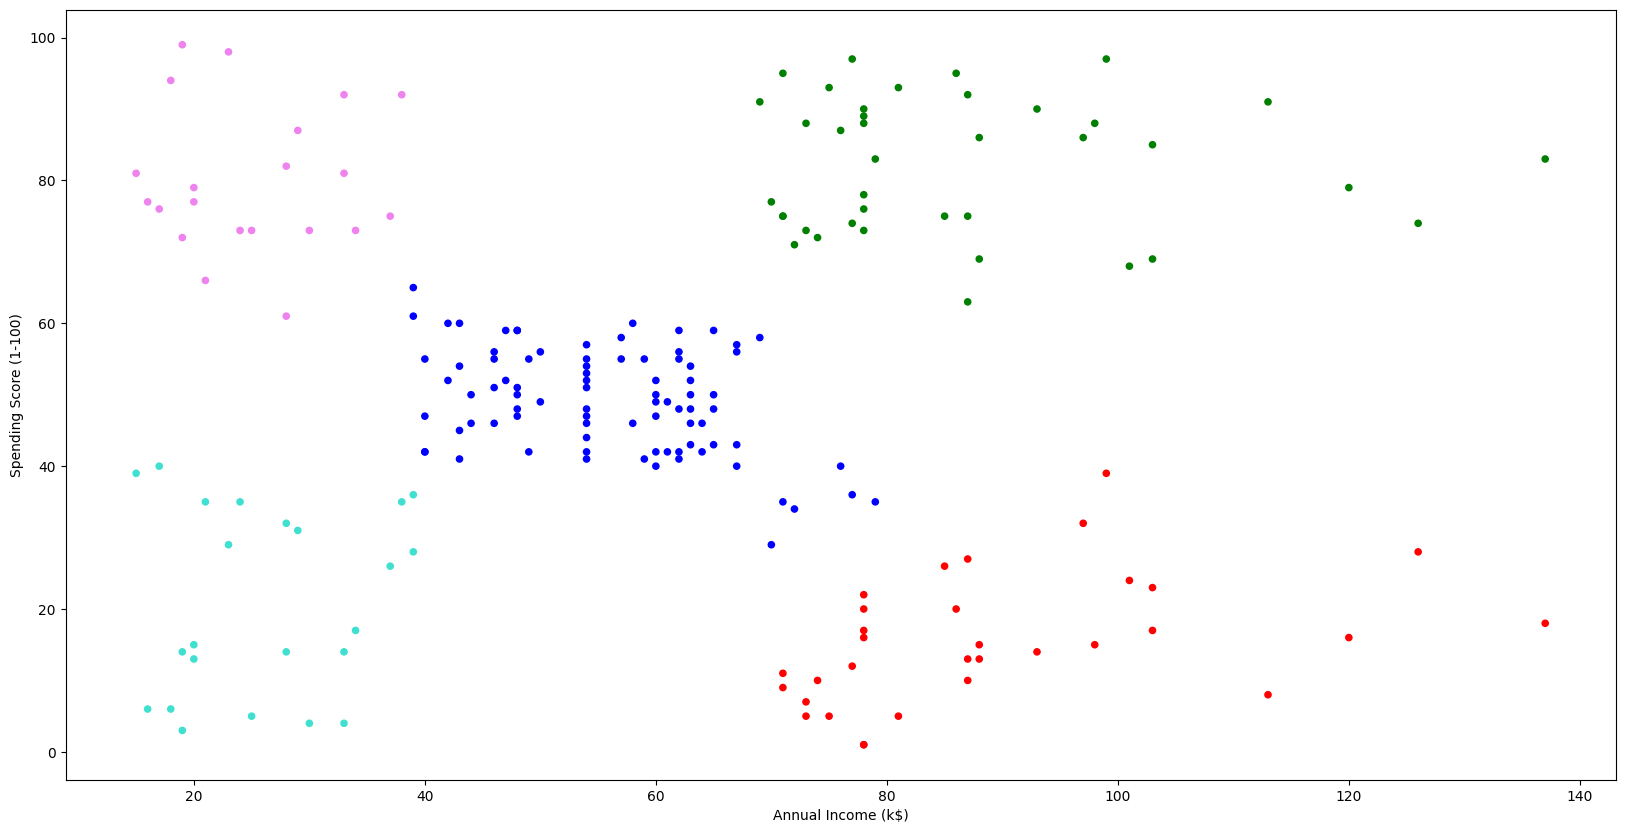

In [ ]:
clasif = classifiers[5]
labels = pd.Series(clasif.labels_)
col_dict = {
    0: 'Red',
    1: 'Blue',
    2: 'Green',
    3: 'Violet',
    4: 'Turquoise'
}
colors = labels.map(col_dict)
_ = df.plot.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', c=colors, figsize=(20,10))

Aunque los cluster tienen una forma muy parecida a los encontrados por `kMeans`, observamos que el cluster central parece ser más grande.